<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [1]:
#cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
#cell 2
data=pd.read_csv('googleplaystore.csv')

## EDA

In [3]:
#cell 3
print('data shape:',data.shape)
data.head()

data shape: (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#cell 4
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<!DOCTYPE html>
<html>
<body>
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
    infoی جدول را دریافت می‌کنیم. مشاهده می‌شود که فقط یکی از ستون‌ها از نوع عددی است. همچنین از ستون Non-Null Count می‌توان متوجه شد که کدام ستون‌ها داده‌ی خالی دارند. با توجه به اینکه ستون داده‌های Price به راحتی قابل تبدیل به مقادیر عددی هستند و در این صورت می‌توان تحلیل بهتری روی آن‌ها انجام داد، در سلول شش آن‌ها را به مقادیر عددی تبدیل می‌کنیم. در سلول پنج مقادیر خاص Price را بررسی کردیم که دیدیم تنها یک ردیف (۱۰۴۷۲) از فرمت دیگر داده‌ها پیروی نکرده است.<br>
    </p>
    </div>
</html>
</body>

## Data Preprocessing

In [5]:
#cell 5
print(data.Price.unique())
data[data.Price=='Everyone']

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
#cell 6
def f1(inp):
    if inp=='Everyone' or inp=='0':
        return 0
    else:
        return float(inp[1:])
data.Price=data.Price.apply(f1)


In [7]:
#cell 7
for word in data.Reviews:
    try:
        int(word)
    except:
        print(word)

3.0M


<!DOCTYPE html>
<html>
<body>
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
ردیف‌هایی که داده‌ی 0 یا Everyone دارند، مقدار 0 می‌گیرند و باقی ردیف‌ها پس از کنار گذاشتن علامت $ باقی عدد را به صورت float دریافت می‌کنند.
همین کار را در مورد ستون Reviews انجام دادیم. 
    </p>
    </div>
</html>
</body>

In [8]:
#cell 8
def f2(inp):
    try:
        return np.array(inp, dtype=np.float64)
    except:
        return np.array(3000000, dtype=np.float64)
data.Reviews=data.Reviews.apply(f2)

In [9]:
#cell 9
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<!DOCTYPE html>
<html>
<body>
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
دوباره ردیف‌های بالایی جدول را مشاهده می‌کنیم که در این جدول داده‌های ستون Price به روزرسانی شده اند.    </p>
    </div>
</html>
</body>

In [10]:
#cell 10
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,1.084100e+04,10841,10841,10840,10841.000000,10840,10841,10841,10833,10838
unique,9660,34,NaN,NaN,462,22,3,NaN,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,"1,000,000+",Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,NaN,1695,1579,10039,NaN,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,4.443887e+05,NaN,NaN,NaN,1.027273,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,2.927728e+06,NaN,NaN,NaN,15.948971,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,2.094000e+03,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,5.479800e+04,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
خلاصه‌ی داده‌های جدول گزارش می‌شود. با توجه به اینکه بیشتر داده‌ها عددی نیستند، بسیاری از داده‌های آماری در مورد آن‌ها قابل ارائه نیستند.    </p>
    </div>
</html>
</body>

## Strorytelling - Visualization

In [11]:
#cell 11
pd.crosstab(data.Type,data['Content Rating'],normalize='columns')

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,1.0,0.920243,0.920097,0.95992,0.956954,1.0
Paid,0.0,0.079757,0.079903,0.04008,0.043046,0.0


<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
 کراستب بین نوع برنامه Content Rating آن‌ها داده شده که داده‌ها بر اساس ستون‌ها نرمالایز شده اند.    </p>
    </div>
</html>
</body>

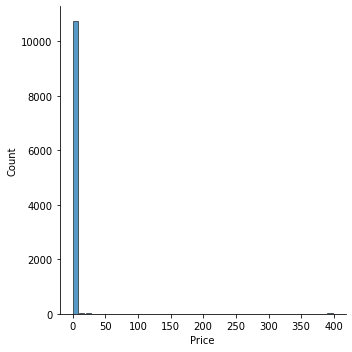

In [12]:
#cell 12
%matplotlib inline
sns.displot(data, x="Price",bins=40,shrink=0.8)

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
نمودار قیمت داده‌ها نمایش داده شده است که بر اساس آن می‌توان فهمید که مقدار خیلی کمی از برنامه‌ها هزینه‌ی حدود ۲۰ دلار و تعداد کمی نیز هزینه‌ی نزدیک ۴۰۰ دلار دارند و از حدود ۲۰ تا حدود ۴۰۰ دلار تقریبا هیچ برنامه‌ای وجود ندارد.    </p>
    </div>
</html>
</body>

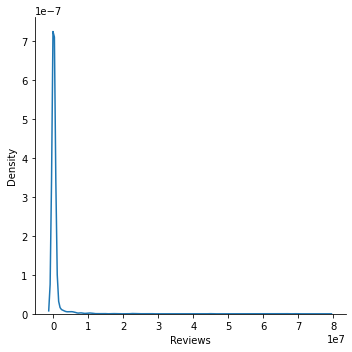

In [13]:
#cell 13
sns.displot(data, x="Reviews",kind='kde')

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
می‌توان پراکندگی Category داده‌ها بر اساس Content Rating آن‌ها مشاهده کرد. همچنین از طریق رنگ دایره‌ها می‌توان فهمید که میزان نصب آن‌ها به چه میزان بوده است.    </p>
    </div>
</html>
</body>

In [15]:
list(reversed(sorted(data.Reviews)))

[78158306.0,
 78128208.0,
 69119316.0,
 69119316.0,
 69109672.0,
 66577446.0,
 66577313.0,
 66577313.0,
 66509917.0,
 56646578.0,
 56642847.0,
 56642847.0,
 44893888.0,
 44891723.0,
 44891723.0,
 44881447.0,
 42916526.0,
 27725352.0,
 27725352.0,
 27724094.0,
 27723193.0,
 27722264.0,
 27711703.0,
 25655305.0,
 25623548.0,
 24900999.0,
 23136735.0,
 23134775.0,
 23133508.0,
 23125280.0,
 22430188.0,
 22430188.0,
 22429716.0,
 22428456.0,
 22428456.0,
 22426677.0,
 22419455.0,
 17714850.0,
 17712922.0,
 17712922.0,
 17015352.0,
 17014787.0,
 17014705.0,
 17000166.0,
 16771865.0,
 14892469.0,
 14891223.0,
 14885236.0,
 14201891.0,
 14201604.0,
 14200550.0,
 14200344.0,
 14198602.0,
 14198297.0,
 14184910.0,
 13479633.0,
 12843436.0,
 12842860.0,
 12759815.0,
 12759663.0,
 11667403.0,
 11667403.0,
 11657972.0,
 11335481.0,
 11335255.0,
 11334973.0,
 11334973.0,
 11334799.0,
 10981850.0,
 10979062.0,
 10859051.0,
 10858556.0,
 10858538.0,
 10847682.0,
 10790289.0,
 10790289.0,
 10790092.0,

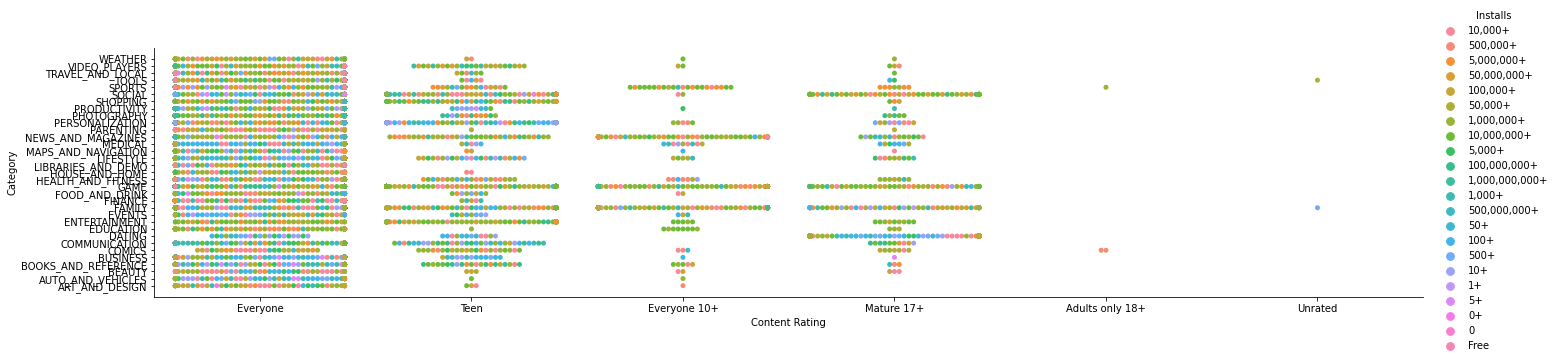

In [16]:
#cell 14
sns.catplot(x="Content Rating", y="Category", hue="Installs", kind="swarm",height=4, data=data,aspect=5)

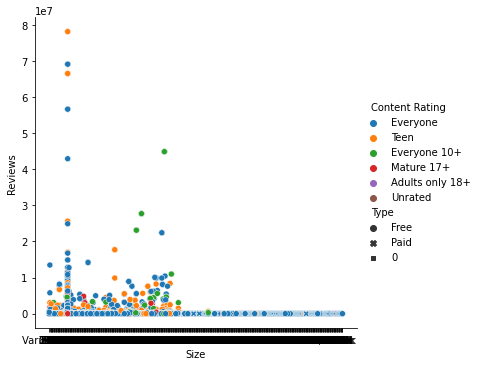

In [18]:
#cell 15
sns.relplot(x="Size", y="Reviews", hue="Content Rating", style="Type", data=data)

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
نیز نمودار Reviews بر اساس Size رسم شده است که بر اساس شکل و رنگ نقطه‌ها می‌توان فهمید که مربوط به کدام Type و Content Rating هستند.    </p>
    </div>
</html>
</body>

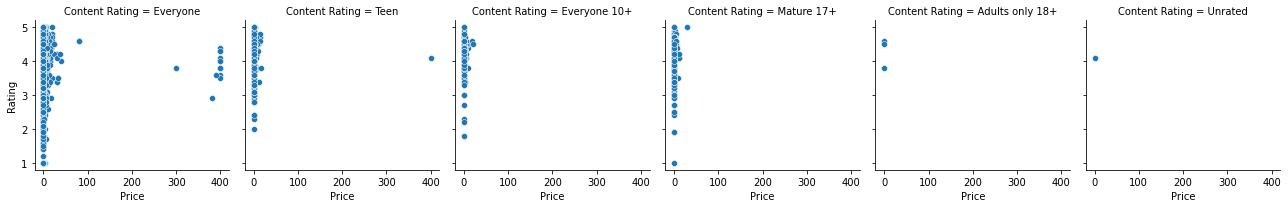

In [19]:
#cell 16
g = sns.FacetGrid(data, col="Content Rating")
g.map(sns.scatterplot, "Price", "Rating")

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
مشخص است که برای هر content Rating نمودار قیمت و میانگین امتیازات چگونه بوده است. از این نمودار در اولین نگاه می‌توان این نتیجه را گرفت که بیشتر برنامه‌های پولی، امتیاز بالای ۳ کسب کرده اند و تعداد برنامه‌های پولی که نمرات پایینی دریافت کرده اند بسیار ناچیز است.    </p>
    </div>
</html>
</body>

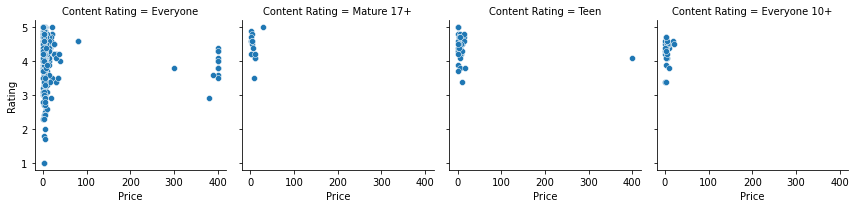

In [20]:
#cell 17
g2 = sns.FacetGrid(data[data.Price>0], col="Content Rating")
g2.map(sns.scatterplot, "Price", "Rating")

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
برای بررسی بیشتر در سلول ۱۷ نمودار فقط برای برنامه‌هایی که باید برای نصب آن‌ها هزینه‌ای پرداخت کرد، نمایش داده می‌شوند.    </p>
    </div>
</html>
</body>